**Notebook credit**: based on the F. Chollet's original notebook [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb).

# Fundamentals of machine learning

## Improving model fit

Many DL projects will go through the following progression (also listed are ideas that help you make progress if you're stuck at a particular stage):

- You're able to get training started: your training loss goes down over time.
  - If not, try changing gradient descent parameters
- Your model meaningfully generalizes: you can beat a common-sense baseline you set.
  - If not, leverage better architecture priors
- Your model is able to _overfit_, i.e., it can perfectly fit the training data (low training loss) but perhaps at the cost of high validation loss.
  - If not, increase model capacity.

At this point, you have reached a milestone and can start focusing on refining generalization by fighting overfitting.

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

An inappropriately large learning rate( of value 1) can cause training to fail even on a simple problem like MNIST.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 7s 16ms/step - loss: 992.7418 - accuracy: 0.3740 - val_loss: 2.4995 - val_accuracy: 0.2242
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 4.6614 - accuracy: 0.2510 - val_loss: 2.2415 - val_accuracy: 0.2842
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 2.7099 - accuracy: 0.2517 - val_loss: 2.5704 - val_accuracy: 0.2942
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 3.8257 - accuracy: 0.2789 - val_loss: 2.4318 - val_accuracy: 0.2013
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 2.5422 - accuracy: 0.2546 - val_loss: 2.1017 - val_accuracy: 0.2611
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6077 - accuracy: 0.2844 - val_loss: 2.6175 - val_accuracy: 0.2828
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.5

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3476 - accuracy: 0.9110 - val_loss: 0.1604 - val_accuracy: 0.9592
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1349 - accuracy: 0.9646 - val_loss: 0.1371 - val_accuracy: 0.9674
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1118 - accuracy: 0.9730 - val_loss: 0.1824 - val_accuracy: 0.9637
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0976 - accuracy: 0.9776 - val_loss: 0.1838 - val_accuracy: 0.9656
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0816 - accuracy: 0.9819 - val_loss: 0.2463 - val_accuracy: 0.9663
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0770 - accuracy: 0.9843 - val_loss: 0.2247 - val_accuracy: 0.9686
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0660 - accuracy: 0.9870 - val_loss: 0.2495 - val_accuracy: 0.9707
Epoch 

If training appears to get stuck, you can try the following:

- Lowering or increasing the learning rate. A learning rate that is too high may lead to updates that vastly overshoot a proper fit, like in the preceding example, and a learning rate that is too low may make training so slow that it appears to stall.
- Increasing the batch size. A batch with more samples will lead to gradients that are more informative and less noisy (lower variance).

### Leveraging better architecture priors

You are able to get training started, but for some reason your validation metrics aren't improving at all. They remain no better than what a random classifier would achieve: your model trains but doesn't generalize. There might be several reasons why this might be happening. Two common ones are:

**Input data simply doesn't contain sufficient information to predict your targets**

- what happened when we tried to fit an MNIST model where the labels were shuffled
- the model would train just fine, but validation accuracy would stay stuck at 10%
- it was plainly impossible to generalize with such a dataset

**The kind of model you're using is not suited for the problem at hand**

- In a timeseries prediction problem, a densely connected architecture may be less appropriate: a _recurrent_ architecture might generalize better
- Using a model that makes the right assumptions about the problem is essential to achieve generalization: you should leverage the right architecture priors
- We willl learn about the best architectures to use for a variety of data modalities—images, text, timeseries, and so on

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6675 - accuracy: 0.8377 - val_loss: 0.3589 - val_accuracy: 0.9029
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3520 - accuracy: 0.9030 - val_loss: 0.3088 - val_accuracy: 0.9130
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3156 - accuracy: 0.9130 - val_loss: 0.2918 - val_accuracy: 0.9198
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.9159 - val_loss: 0.2818 - val_accuracy: 0.9210
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.9190 - val_loss: 0.2759 - val_accuracy: 0.9236
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.9213 - val_loss: 0.2740 - val_accuracy: 0.9226
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9220 - val_loss: 0.2688 - val_accuracy: 0.9263
Epoch 

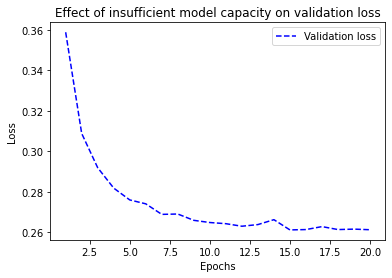

In [ ]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- Validation metrics seem to stall, or to improve very slowly, instead of peaking and reversing course.
- You can fit, but you can’t clearly overfit, even after many iterations over the training data.

**It should always be possible to overfit**

- If you can’t seem to be able to overfit, it’s likely a problem with the representational power of your model
- You’re going to need a bigger model, one with more capacity, that is to say, one able to store more information
- You can increase representational power by
  - adding more layers
  - using bigger layers (layers with more parameters)
  - using kinds of layers that are more appropriate for the problem at hand (better architecture priors).

Let’s try training a bigger model, one with two intermediate layers with 96 units each:

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3636 - accuracy: 0.8974 - val_loss: 0.1878 - val_accuracy: 0.9473
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1601 - accuracy: 0.9532 - val_loss: 0.1470 - val_accuracy: 0.9570
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1129 - accuracy: 0.9672 - val_loss: 0.1262 - val_accuracy: 0.9634
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0884 - accuracy: 0.9736 - val_loss: 0.1033 - val_accuracy: 0.9697
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0703 - accuracy: 0.9790 - val_loss: 0.1015 - val_accuracy: 0.9712
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.1063 - val_accuracy: 0.9711
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0468 - accuracy: 0.9860 - val_loss: 0.0928 - val_accuracy: 0.9753
Epoch 

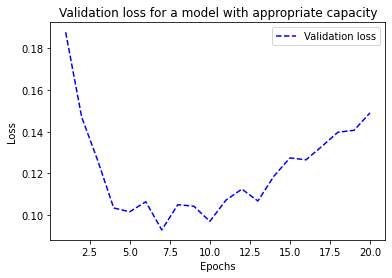

In [ ]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Regularizing your model

Regularization: actively impeding the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation.

- regularizing a model is a process that should always be guided by an accurate evaluation procedure
- you will only achieve generalization if you can measure it!

Let’s review some of the most common regularization techniques in the context of IMDB movie reviews problem


#### Reducing the network's size

- a model that is too small will not overfit
- simplest way to mitigate overfitting is to reduce the size of the model
- number of learnable parameters in the model is determined by the number of layers and the number of units per layer
- however, you should use models that have enough parameters that they don’t underfit!
- compromise is to be found between too much capacity and not enough capacity
- no magical formula to determine the right number of layers or the right size for each layer
- evaluate an array of different architectures (on your validation set, not on your test set, of course) in order to find the correct model size for your data
- general workflow for finding an appropriate model size:
  - start with relatively few layers and parameters
  - increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5219 - accuracy: 0.7872 - val_loss: 0.3957 - val_accuracy: 0.8520
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3081 - accuracy: 0.8985 - val_loss: 0.3227 - val_accuracy: 0.8678
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2203 - accuracy: 0.9279 - val_loss: 0.2807 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1746 - accuracy: 0.9444 - val_loss: 0.2798 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1391 - accuracy: 0.9559 - val_loss: 0.2923 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1155 - accuracy: 0.9633 - val_loss: 0.2936 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0941 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.6381 - accuracy: 0.6441 - val_loss: 0.5899 - val_accuracy: 0.7186
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5477 - accuracy: 0.7877 - val_loss: 0.5318 - val_accuracy: 0.8344
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4879 - accuracy: 0.8550 - val_loss: 0.4918 - val_accuracy: 0.8325
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4400 - accuracy: 0.8878 - val_loss: 0.4580 - val_accuracy: 0.8581
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3976 - accuracy: 0.9108 - val_loss: 0.4273 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3571 - accuracy: 0.9263 - val_loss: 0.3986 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3058 - accuracy: 0.9410 - val_loss: 0.3468 - val_accuracy: 0.8833
Epoch 8/20
30

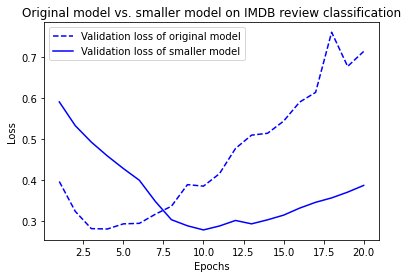

In [ ]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller, "b-",
         label="Validation loss of smaller model")
plt.title("Original model vs. smaller model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- the smaller model starts overfitting later than the reference model
- its performance degrades more slowly once it starts overfitting

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 9s 270ms/step - loss: 0.5367 - accuracy: 0.7453 - val_loss: 0.3917 - val_accuracy: 0.8290
Epoch 2/20
30/30 [==============================] - 8s 257ms/step - loss: 0.2613 - accuracy: 0.8948 - val_loss: 0.2931 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 8s 257ms/step - loss: 0.1512 - accuracy: 0.9448 - val_loss: 0.2978 - val_accuracy: 0.8925
Epoch 4/20
30/30 [==============================] - 8s 256ms/step - loss: 0.0946 - accuracy: 0.9703 - val_loss: 0.3611 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 8s 257ms/step - loss: 0.0096 - accuracy: 0.9983 - val_loss: 0.4970 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 8s 257ms/step - loss: 0.2019 - accuracy: 0.9733 - val_loss: 0.4053 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 8s 257ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5348 - val_accuracy: 0.8865
Epoch 

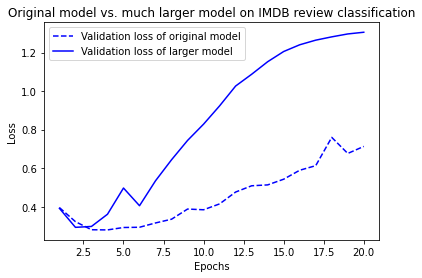

In [ ]:
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b-",
         label="Validation loss of larger model")
plt.title("Original model vs. much larger model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- bigger model starts overfitting almost immediately
- it overfits much more severely
- its validation loss is also noisier
- it gets training loss near zero very quickly
- a very high capacity model will
  - fit the the training data quickly (resulting in a low training loss)
  - but will be more susceptible it is to overfitting (resulting in a large difference between the training and validation loss)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

Regularization can be applied to:
- weights using `kernel_regularizer`
- biases using `bias_regularizer`
- output of the layer using `activity_regularizer`

We will use weight regularization below.

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    # every coefficient in the weight matrix of the layer will add
    # 0.002 * weight_coefficient_value ** 2
    # to the total loss of the model
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6070 - accuracy: 0.7675 - val_loss: 0.4807 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4128 - accuracy: 0.8929 - val_loss: 0.3955 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3467 - accuracy: 0.9133 - val_loss: 0.3710 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3092 - accuracy: 0.9222 - val_loss: 0.3710 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2882 - accuracy: 0.9309 - val_loss: 0.3671 - val_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2724 - accuracy: 0.9325 - val_loss: 0.3595 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2563 - accuracy: 0.9422 - val_loss: 0.3670 - val_accuracy: 0.8812
Epoch 8/20
30

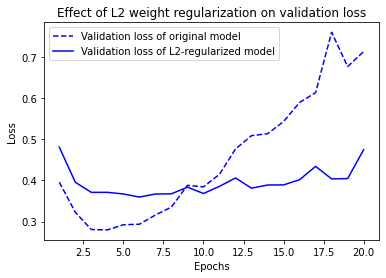

In [ ]:
val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l2_reg, "b-",
         label="Validation loss of L2-regularized model")
plt.title("Effect of L2 weight regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- model with L2 regularization has become much more resistant to overfitting than the reference model
- both models have the same number of parameters

**Total loss when using weight regularization includes prediction losses as well as layer losses**

- "loss" as a metric changes meaning when you have weight regularization
- without regularization, loss is simply the average of the prediction loss function over the dataset
- with weight regularization, loss includes *both* prediction losses as well as regularization losses for regularized layers

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

- weight regularization is more typically used for smaller deep learning models
- large deep learning models tend to be so overparameterized that imposing constraints on weight values hasn’t much impact on model capacity and generalization
- in these cases, a different regularization technique is preferred: **dropout**

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6315 - accuracy: 0.6429 - val_loss: 0.5293 - val_accuracy: 0.8284
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5077 - accuracy: 0.7844 - val_loss: 0.4224 - val_accuracy: 0.8726
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4287 - accuracy: 0.8341 - val_loss: 0.3636 - val_accuracy: 0.8755
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3633 - accuracy: 0.8701 - val_loss: 0.3236 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3141 - accuracy: 0.8933 - val_loss: 0.2992 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2737 - accuracy: 0.9095 - val_loss: 0.2856 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2426 - accuracy: 0.9189 - val_loss: 0.2947 - val_accuracy: 0.8896
Epoch 8/20
30

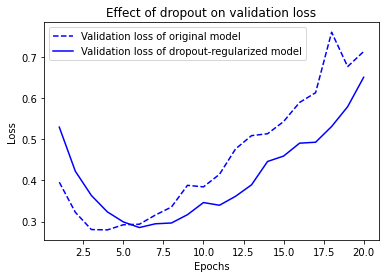

In [ ]:
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b-",
         label="Validation loss of dropout-regularized model")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- dropout achieves clear improvement over the reference model
- it also seems to be working much better than L2 regularization (lowest validation loss reached has improved)

**How does dropout work?**

- dropout, **applied to a layer**, consists of randomly dropping out (setting to zero) a number of output features of the layer **during training**
- after applying dropout, the layer output will have a few zero entries distributed at random
- the dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5.

In [ ]:
batch_size = 4
feature_dim = 5
layer_output = tf.random.uniform((batch_size, feature_dim)) # in reality, layer_output will not be random
layer_output.numpy()

array([[0.905645  , 0.8570291 , 0.7257302 , 0.95755136, 0.74638176],
       [0.16765738, 0.06710732, 0.8286674 , 0.2801174 , 0.74845433],
       [0.21975768, 0.6561687 , 0.06725407, 0.74947083, 0.29422402],
       [0.15977025, 0.91589606, 0.28260374, 0.26349282, 0.33665097]],
      dtype=float32)

In [ ]:
dropout = 0.2 # dropout probability
mask = tf.random.uniform(shape=layer_output.shape) < 1 - dropout # random boolean array where True occurs with prob 1-dropout
mask = tf.cast(mask, tf.float32) # convert True/False to 1/0
mask.numpy()

array([[1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 1.]], dtype=float32)

In [ ]:
layer_output_dropout = layer_output * mask
layer_output_dropout.numpy() # roughly half of the entries will have been zeroed out

array([[0.905645  , 0.8570291 , 0.7257302 , 0.        , 0.74638176],
       [0.16765738, 0.        , 0.8286674 , 0.2801174 , 0.74845433],
       [0.        , 0.6561687 , 0.06725407, 0.        , 0.29422402],
       [0.15977025, 0.        , 0.28260374, 0.        , 0.33665097]],
      dtype=float32)

In [ ]:
layer_output_dropout /= 1 - dropout # keep the random layer output unbiased!

**Simulation to check for unbiased property**

Suppose we have a weight $w$ and we zero it out with probability $p$ as follows:

$$
w_D = w \cdot 1[U < 1-p]
$$

where random variable $U$ distributed as Uniform$(0,1)$. Can you verify the following unbiasedness property?

$$
E\left[ \frac{w_D}{1-p} \right] = w
$$

Note that $w_D$ is either $w$ (with prob $1-p$) or $0$ (with prob $p$) and therefore

$$
E\left[ w_D \right] = w \cdot (1-p) + 0 \cdot p = w(1-p)
$$

In [ ]:
num_iters = 1000
sum = tf.zeros_like(layer_output)
for i in range(num_iters):
  mask = tf.random.uniform(shape=layer_output.shape) < 1 - dropout
  mask = tf.cast(mask, tf.float32)
  layer_output_dropout = layer_output * mask
  layer_output_dropout /= 1 - dropout
  sum += layer_output_dropout
average = sum/num_iters
print("original layer output:\n", layer_output.numpy())  # original layer output
print(f"average over {num_iters} applications of dropout:\n", average.numpy()) # the average of zeroed out layer outputs will be close to the original output

original layer output:
 [[0.905645   0.8570291  0.7257302  0.95755136 0.74638176]
 [0.16765738 0.06710732 0.8286674  0.2801174  0.74845433]
 [0.21975768 0.6561687  0.06725407 0.74947083 0.29422402]
 [0.15977025 0.91589606 0.28260374 0.26349282 0.33665097]]
average over 1000 applications of dropout:
 [[0.90904737 0.875243   0.7121247  0.9611487  0.72959197]
 [0.1695421  0.06844977 0.8224481  0.28081676 0.7419022 ]
 [0.22278143 0.6496061  0.06759074 0.74946624 0.29495952]
 [0.16176727 0.90331066 0.27836478 0.26085648 0.3374894 ]]


**The paper that introduced dropout**

If you're interested in learning more about dropout including the motivation behind it and connections to deterministic forms of regularization, see the paper:

Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014).  
Dropout: a simple way to prevent neural networks from overfitting.  
The Journal of Machine Learning Research, 15(1), 1929-1958.  
https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf